In [10]:
import pandas as pd
from collections import defaultdict

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

pylab.rcParams['figure.figsize'] = (20, 10)

plt.subplots_adjust(top=0.9)

folder = '/home/jgf/git/Empirical/examples/evo/concept/nomap/standard-grid-noevo_defc_vs_coop/'

num_reps = 10

base_template = "{tlf}{parb}{paropt}/{struct}-{rep}-quorum.csv"

options = [60]

loaded_replicants = []
loaded_parent = []
loaded_base = []
loaded_children = []

parent_base = 'GRID_X_'
structure = ['standard-grid-quorum.out']

for parent in options:
    for replicant in range(0,num_reps):
        try:
            loaded = pd.read_csv(base_template.format(tlf=folder,
                                                      parb=parent_base,
                                                      paropt=parent,
                                                      struct=structure[0],
                                                      rep=replicant), sep=' ')
        except Exception as err:
            print("Apparently there isn't anything in there")
            print(base_template.format(tlf=folder,
                                      parb=parent_base,
                                      paropt=parent,
                                      struct=structure[0],
                                      rep=replicant))
            continue

        loaded['replicant'] = replicant
        loaded_children.append(loaded)
    loaded_parent = pd.concat(loaded_children)
    loaded_parent['grid_width'] = parent
    loaded_children = []
    loaded_base.append(loaded_parent)

squished_base = pd.concat(loaded_base)
squished_base = squished_base.drop_duplicates()
squished_base.head()

Populating the interactive namespace from numpy and matplotlib


,update,avg_age,max_age,avg_coop,avg_points,percenttruthful_defector,percentdonator,grid_usage,available_private_pts,replicant,grid_width
0,0,0.0000,0,0.500000,0.0000,0.500000,0.500000,0.100000,75000.0,0,60
1,10,10.0000,10,0.513043,10.0000,0.486957,0.513043,0.095833,100000000.0,0,60
2,20,20.0000,20,0.513043,20.0000,0.486957,0.513043,0.095833,100000000.0,0,60
3,30,13.0939,30,0.585714,15.1918,0.414286,0.585714,0.136111,100000000.0,0,60
4,40,19.0432,40,0.556391,21.0451,0.443609,0.556391,0.147778,100000000.0,0,60


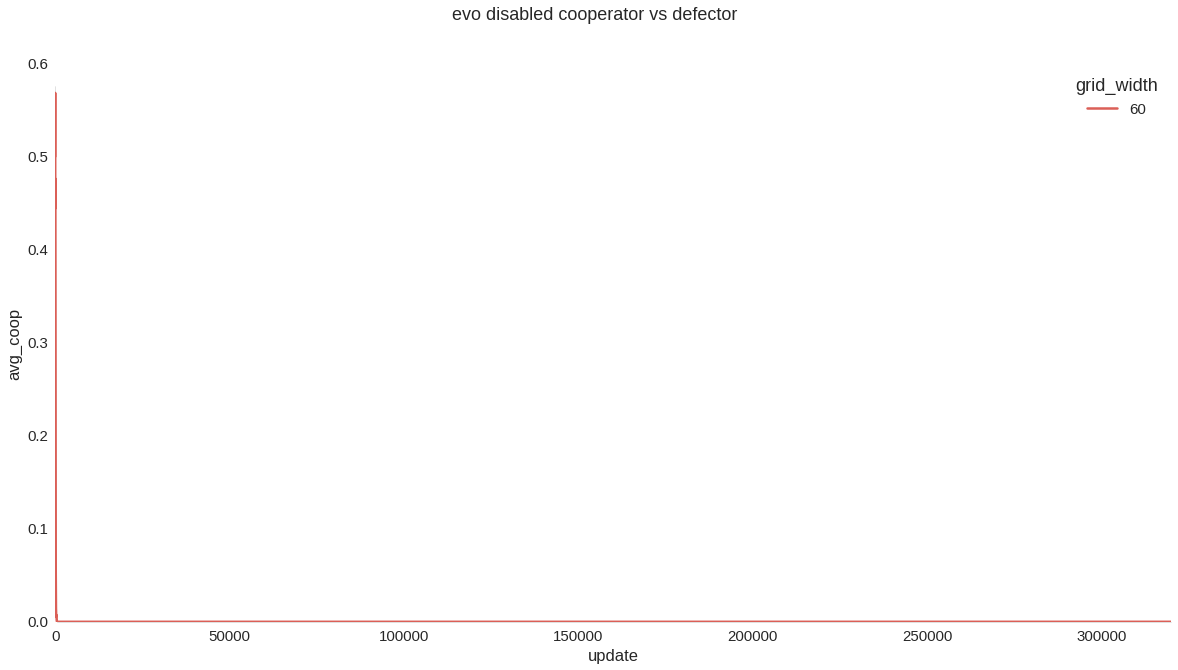

In [11]:
sns.plt.suptitle("evo disabled cooperator vs defector")
ax = sns.tsplot( time="update", value="avg_coop", unit="replicant", 
    condition="grid_width", ci=95, data=squished_base, color="hls")
ax.patch.set_visible(False)
#squished_base[ (squished_base['replicant'] == 5) &  (squished_base["Subgrid Size"] == 10) & (squished_base['update'] == 10)]